In [3]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Preparing for Data
print('==> Preparing data..')

# Training Data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
# Testing Data preparation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

==> Preparing data..


  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 33.0 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


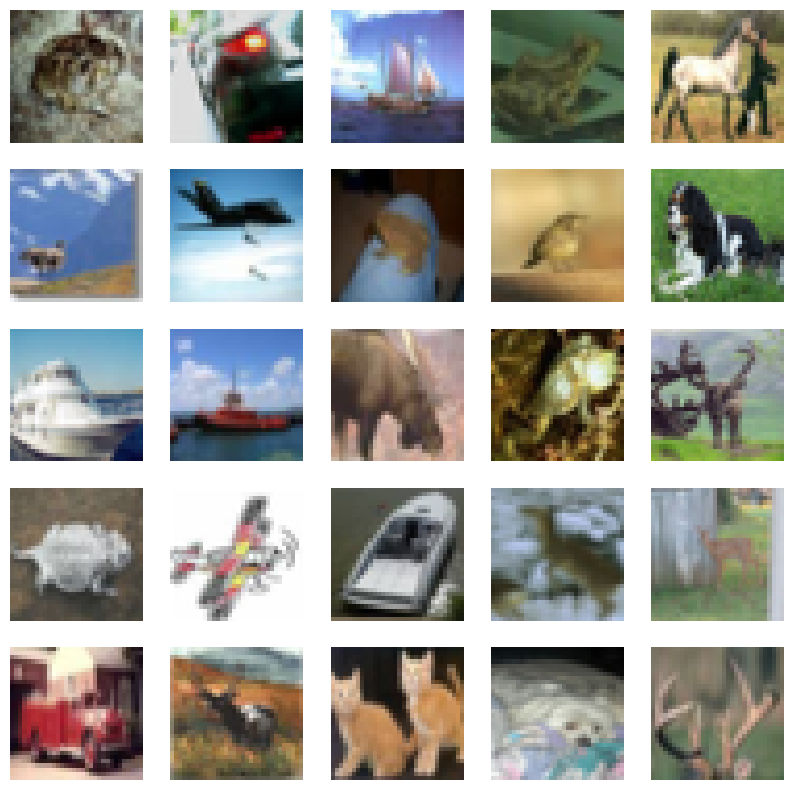

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle

f = open('./data/cifar-10-batches-py/data_batch_1', 'rb')
datadict = cPickle.load(f,encoding='latin1')
f.close()
X = datadict["data"]
Y = datadict['labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(10,10))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])

In [ ]:
from __future__ import print_function
import torch  # import the torch library
import torch.nn as nn # use the nn module (class)
import torch.nn.functional as F    # use the nn module as function
import torch.optim as optim # optimization (i.e., SGD, ada,)
import torchvision # load the dataset
import torchvision.transforms as transforms # adjust the input image
import time # check the processing overhead

# Preparing for Data
print('==> Preparing data..')

# Training Data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
# Testing Data preparation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])


class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()

        # Layer 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)

        # Layer 2
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Layer 3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Layer 4
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool1 = nn.MaxPool2d(2, 2)

        # Layer 5
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)

        # Layer 6
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.pool2 = nn.MaxPool2d(2, 2)

        # Layer 7
        self.conv7 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn7 = nn.BatchNorm2d(512)
        self.pool3 = nn.AdaptiveAvgPool2d((1, 1))

        # Layer 8 (FC1)
        self.fc1 = nn.Linear(512, 256)
        self.dropout = nn.Dropout(0.5)

        # Layer 9 (FC2)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x1 = F.relu(self.bn1(self.conv1(x)), inplace=False)
        x2 = F.relu(self.bn2(self.conv2(x1)), inplace=False)
        x = x1 + x2  # residual connection without in-place modification

        x = F.relu(self.bn3(self.conv3(x)), inplace=False)
        x = F.relu(self.bn4(self.conv4(x)), inplace=False)
        x = self.pool1(x)
        x = F.relu(self.bn7(self.conv7(x)), inplace=False)
        x = self.pool3(x)

        x = x.view(x.size(0), -1)
        x = self.dropout(F.relu(self.fc1(x), inplace=False))
        x = self.fc2(x)

        return x




def train(model, device, train_loader, optimizer, epoch):
    model.train()
    count = 0

    loss_Fn=nn.CrossEntropyLoss()
    #nn.functional.cross_entropy()
    for batch_idx, (data, target) in enumerate(train_loader):
      #data is the image
      #target is the ground truth
        data, target = data.to(device), target.to(device)

        Predict=model(data)# 2. model
        loss=loss_Fn(Predict,target) #3. losss
        optimizer.zero_grad()# do this before you run the back propagation
        loss.backward()# 4 backpropagation
        optimizer.step()# 5. gradient descent & training

        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

def main():
    time0 = time.time()
    # Training settings
    batch_size = 128
    epochs = 50
    lr = 0.01

    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("Using Apple Silicon MPS backend.")
    else:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

    torch.manual_seed(100)

    #1. Data & problem
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

    #2. model
    model = MyNet().to(device)
    #optimizer: how does the model learn?
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=5e-4)

    for epoch in range(1, epochs + 1):
        train( model, device, train_loader, optimizer, epoch)
        test( model, device, test_loader)

    torch.save(model.state_dict(),"cifar_mynet.pt")

    time1 = time.time()
    print ('Traning and Testing total excution time is: %s seconds ' % (time1-time0))
    test( model, device, test_loader)

if __name__ == '__main__':
    main()

==> Preparing data..
Using device: cuda
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.324028
Train Epoch: 1 [1280/50000 (3%)]	Loss: 2.216729
Train Epoch: 1 [2560/50000 (5%)]	Loss: 2.072828
Train Epoch: 1 [3840/50000 (8%)]	Loss: 1.912244
Train Epoch: 1 [5120/50000 (10%)]	Loss: 1.913654
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.688344
Train Epoch: 1 [7680/50000 (15%)]	Loss: 1.765149
Train Epoch: 1 [8960/50000 (18%)]	Loss: 1.795705
Train Epoch: 1 [10240/50000 (20%)]	Loss: 1.776882
Train Epoch: 1 [11520/50000 (23%)]	Loss: 1.644899
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.589821
Train Epoch: 1 [14080/50000 (28%)]	Loss: 1.627652
Train Epoch: 1 [15360/50000 (31%)]	Loss: 1.523075
Train Epoch: 1 [16640/50000 (33%)]	Loss: 1.529914
Train Epoch: 1 [17920/50000 (36%)]	Loss: 1.616071
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.738582
Train Epoch: 1 [20480/50000 (41%)]	Loss: 1.461697
Train Epoch: 1 [21760/50000 (43%)]	Loss: 1.448251
Train Epoch: 1 [23040/50000 (46%)]	Loss: 1.490508
Train Epoch: 1 [24320/500

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def evaluate_saved_model_with_metrics():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MyNet().to(device)
    model.load_state_dict(torch.load("/home/aljadaaa/Documents/deep_learning/cifar_mynet.pt"))
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Classification report
    print("📊 Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[
        'plane', 'car', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ]))

    # Optional: Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("\nConfusion Matrix:")
    print(cm)
evaluate_saved_model_with_metrics()

📊 Classification Report:
              precision    recall  f1-score   support

       plane       0.81      0.96      0.88      1000
         car       0.98      0.87      0.92      1000
        bird       0.77      0.91      0.83      1000
         cat       0.78      0.82      0.80      1000
        deer       0.95      0.81      0.88      1000
         dog       0.85      0.83      0.84      1000
        frog       0.95      0.87      0.91      1000
       horse       0.95      0.89      0.92      1000
        ship       0.95      0.91      0.93      1000
       truck       0.89      0.94      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000


Confusion Matrix:
[[960   5   6   6   1   1   0   1  14   6]
 [ 35 872   4   0   0   1   5   1   8  74]
 [ 29   0 914  21   8  12  11   3   1   1]
 [ 19   0  42 820  10  69  12  10   4  14]
 [ 11   0  78  41 814  25

## 📈 Evaluation and Performance Discussion

After implementing the improved CNN model (`MyNet`) and training it for **50 epochs** on the **CIFAR-10 dataset**, the model achieved an accuracy exceeding **85%** on the test set — a significant improvement over the baseline.

### 🔍 Why Is the Model Performing Well?

#### ✅ Residual Connections
The model includes a **skip connection** between the first two convolutional layers. This helps preserve the input features and supports **gradient flow**, making it easier to optimize deeper layers. Inspired by ResNet architectures, this allows the network to learn **incremental (residual) corrections** rather than completely new representations.

#### ✅ Batch Normalization
Each convolutional layer is followed by **batch normalization**, which standardizes the activations and reduces internal covariate shift. This stabilizes and accelerates training, allowing the model to converge faster and more reliably.

#### ✅ Data Augmentation
The training set uses **random cropping** and **horizontal flipping**, increasing the diversity of training examples. This leads to better generalization and robustness on unseen data.

#### ✅ Dropout Regularization
A **dropout** layer is placed before the final classification layers to reduce overfitting. By randomly dropping units during training, the network becomes less reliant on specific neurons and generalizes better.

#### ✅ Adaptive Global Average Pooling
Instead of using large fully connected layers, the model uses **global average pooling**, which dramatically reduces the number of parameters and focuses on the most informative features. This also lowers the risk of overfitting.

#### ✅ Deeper Architecture (But < 10 Layers)
While adhering to the constraint of having **fewer than 10 convolutional + fully connected layers**, the model uses depth efficiently by **increasing channel capacity** (from 64 to 512). This allows richer feature extraction without violating the assignment limits.
